In [1]:
if (!require("RCurl")) install.packages("RCurl")
library(RCurl)
URL <- getURL("https://raw.githubusercontent.com/mfofanagn/Forecasting-US-national-parks-visits-/master/park_visits.csv")
visits <- read.csv(text = URL)

Loading required package: RCurl
Loading required package: bitops


In [2]:
str(visits)

'data.frame':	25587 obs. of  12 variables:
 $ ParkName        : Factor w/ 305 levels "Abraham Lincoln Birthplace NHP",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ParkType        : Factor w/ 8 levels "National Battlefield",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Region          : Factor w/ 7 levels "Alaska","Intermountain ",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ State           : Factor w/ 53 levels "AK","AL","AR",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Year            : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ Month           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ lat             : num  37.6 37.6 37.6 37.6 37.6 ...
 $ long            : num  -85.7 -85.7 -85.7 -85.7 -85.7 ...
 $ cost            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ logVisits       : num  8.26 8.55 8.99 9.81 9.87 ...
 $ laglogVisits    : num  NA 8.26 8.55 8.99 9.81 ...
 $ laglogVisitsYear: num  NA NA NA NA NA NA NA NA NA NA ...


In [3]:
# Manage missing and outlear values

In [4]:
colSums(is.na(visits)) 

ParkName         ParkType           Region            State 
               0                0                0                0 
            Year            Month              lat             long 
               0                0               84               84 
            cost        logVisits     laglogVisits laglogVisitsYear 
               0                0              305             3660

In [5]:
visits = visits[rowSums(is.na(visits)) == 0, ]
visits = visits[visits$logVisits != 0, ]

In [6]:
str(visits)

'data.frame':	21500 obs. of  12 variables:
 $ ParkName        : Factor w/ 305 levels "Abraham Lincoln Birthplace NHP",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ParkType        : Factor w/ 8 levels "National Battlefield",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Region          : Factor w/ 7 levels "Alaska","Intermountain ",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ State           : Factor w/ 53 levels "AK","AL","AR",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Year            : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ lat             : num  37.6 37.6 37.6 37.6 37.6 ...
 $ long            : num  -85.7 -85.7 -85.7 -85.7 -85.7 ...
 $ cost            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ logVisits       : num  7.88 8.2 8.98 9.87 9.74 ...
 $ laglogVisits    : num  8.32 7.88 8.2 8.98 9.87 ...
 $ laglogVisitsYear: num  8.26 8.55 8.99 9.81 9.87 ...


In [7]:
# From data structure above, let's transform Month  variable as factor

In [8]:
visits$Month = as.factor(visits$Month)

In [9]:
str(visits)

'data.frame':	21500 obs. of  12 variables:
 $ ParkName        : Factor w/ 305 levels "Abraham Lincoln Birthplace NHP",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ParkType        : Factor w/ 8 levels "National Battlefield",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Region          : Factor w/ 7 levels "Alaska","Intermountain ",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ State           : Factor w/ 53 levels "AK","AL","AR",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ Year            : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month           : Factor w/ 12 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ lat             : num  37.6 37.6 37.6 37.6 37.6 ...
 $ long            : num  -85.7 -85.7 -85.7 -85.7 -85.7 ...
 $ cost            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ logVisits       : num  7.88 8.2 8.98 9.87 9.74 ...
 $ laglogVisits    : num  8.32 7.88 8.2 8.98 9.87 ...
 $ laglogVisitsYear: num  8.26 8.55 8.99 9.81 9.87 ...


In [10]:
summary(visits)

                           ParkName                         ParkType   
 Abraham Lincoln Birthplace NHP:   72   National Historic Site  :5277  
 Acadia NP                     :   72   National Monument       :4808  
 African Burial Ground NM      :   72   National Park           :4038  
 Agate Fossil Beds NM          :   72   National Historical Park:3007  
 Alibates Flint Quarries NM    :   72   National Memorial       :1850  
 Allegheny Portage Railroad NHS:   72   National Recreation Area:1080  
 (Other)                       :21068   (Other)                 :1440  
               Region         State            Year          Month      
 Alaska           : 725   CA     : 1427   Min.   :2011   8      : 1806  
 Intermountain    :5399   NY     : 1390   1st Qu.:2012   7      : 1805  
 Midwest          :2880   AZ     : 1368   Median :2013   9      : 1805  
 National Capital :1119   PA     :  915   Mean   :2014   6      : 1800  
 Northeast        :4568   MA     :  898   3rd Qu.:2015   10

In [11]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()


In [12]:
head(visits)

,ParkName,ParkType,Region,State,Year,Month,lat,long,cost,logVisits,laglogVisits,laglogVisitsYear
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,Abraham Lincoln Birthplace NHP,National Historical Park,Southeast,KY,2011,1,37.58587,-85.67331,0,7.880048,8.315077,8.263333
14,Abraham Lincoln Birthplace NHP,National Historical Park,Southeast,KY,2011,2,37.58587,-85.67331,0,8.201934,7.880048,8.550241
15,Abraham Lincoln Birthplace NHP,National Historical Park,Southeast,KY,2011,3,37.58587,-85.67331,0,8.977904,8.201934,8.994048
16,Abraham Lincoln Birthplace NHP,National Historical Park,Southeast,KY,2011,4,37.58587,-85.67331,0,9.869931,8.977904,9.808022
17,Abraham Lincoln Birthplace NHP,National Historical Park,Southeast,KY,2011,5,37.58587,-85.67331,0,9.738554,9.869931,9.867394
18,Abraham Lincoln Birthplace NHP,National Historical Park,Southeast,KY,2011,6,37.58587,-85.67331,0,9.975483,9.738554,10.098602


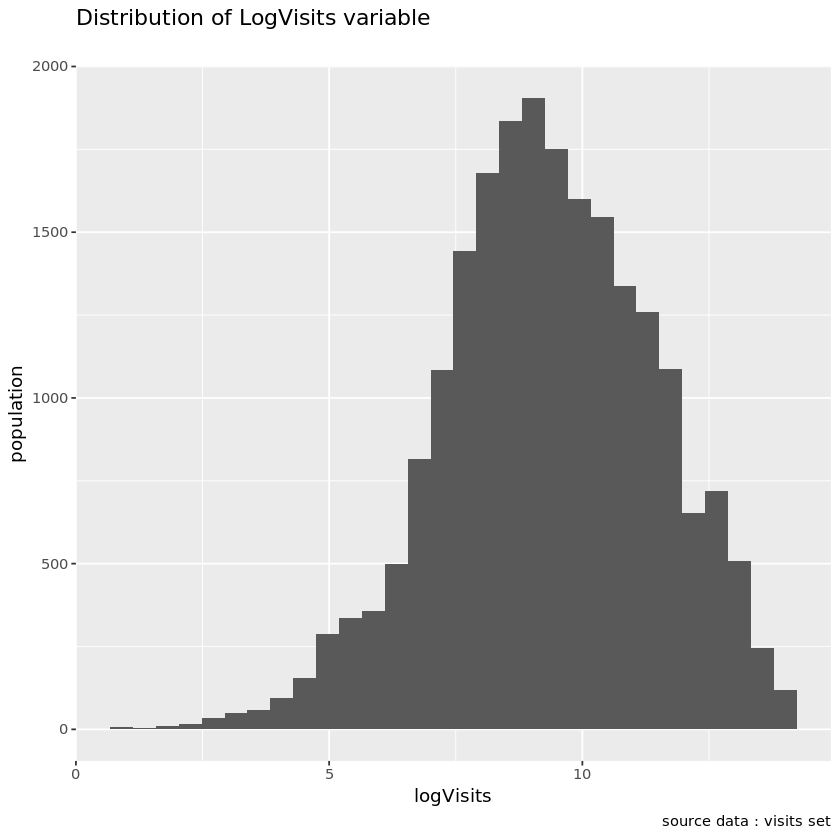

In [13]:
visits %>% 
  ggplot(aes(logVisits)) + 
  geom_histogram( bins=30) +
  ggtitle("Distribution of LogVisits variable") +
  labs(subtitle  ="", 
       x="logVisits" , 
       y="population", 
       caption ="source data : visits set") # +
  #theme(panel.border = element_rect(colour="black", fill=NA)) 


In [14]:
#Checking normality

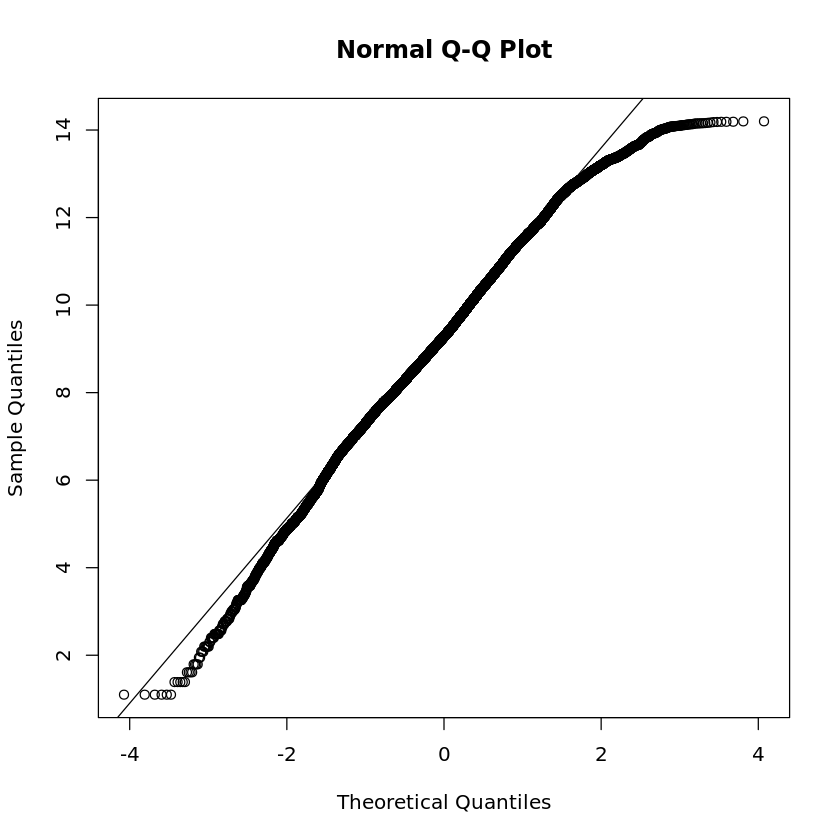

In [15]:
qqnorm(visits$logVisits);qqline(visits$logVisits)

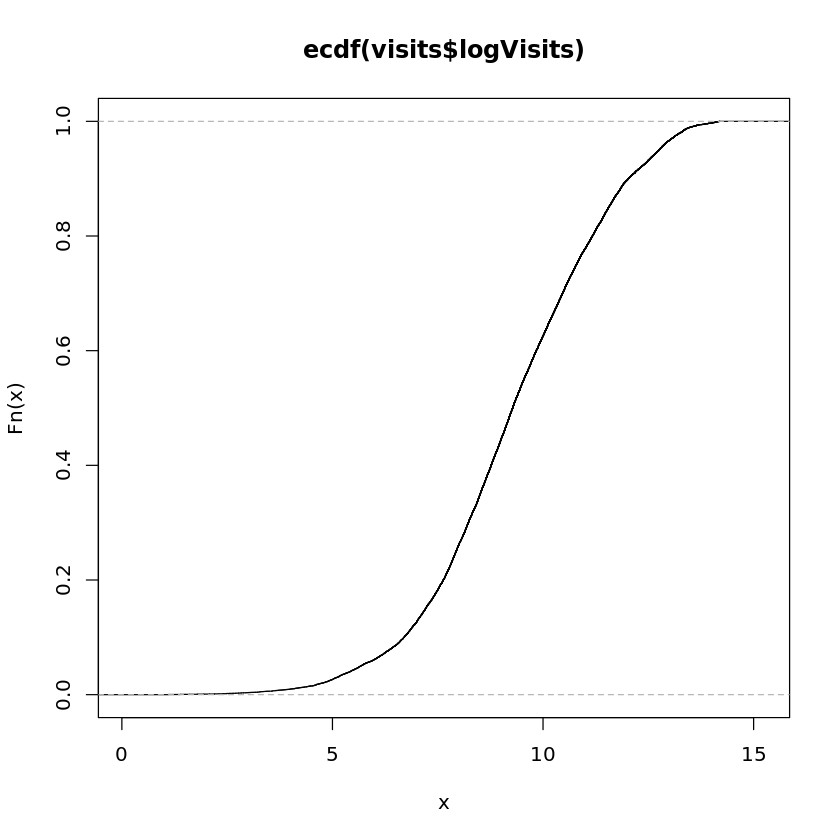

In [16]:
plot(ecdf(visits$logVisits))

In [17]:
# 10 Most visited park

Selecting by n

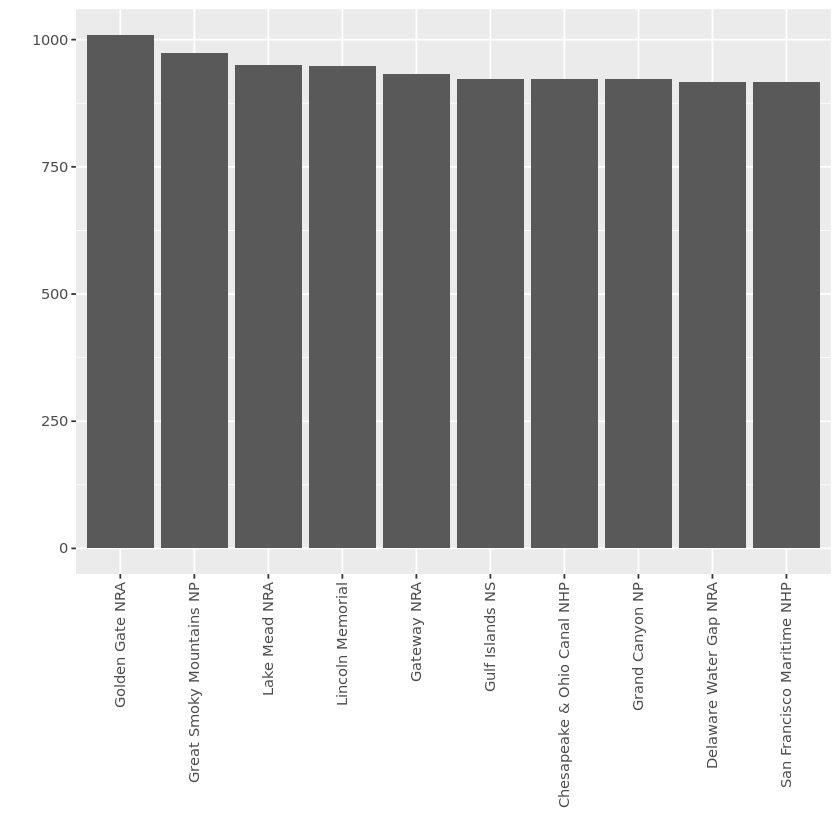

In [18]:
visits %>% group_by(ParkName) %>%
  summarize(n = sum(logVisits)) %>%
  top_n(10, ) %>%
  ggplot(aes(x=reorder(ParkName,n,desc) , y=n)) +
  geom_bar(stat='identity')  +
  labs(x="", y="") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))#+
  #geom_text(aes(label= n), hjust=-0.1, size=3) 
  #labs(title="Top 20 movies title based \n on number of ratings" , caption = "source data: edx set")

In [19]:
#Most visited parkType

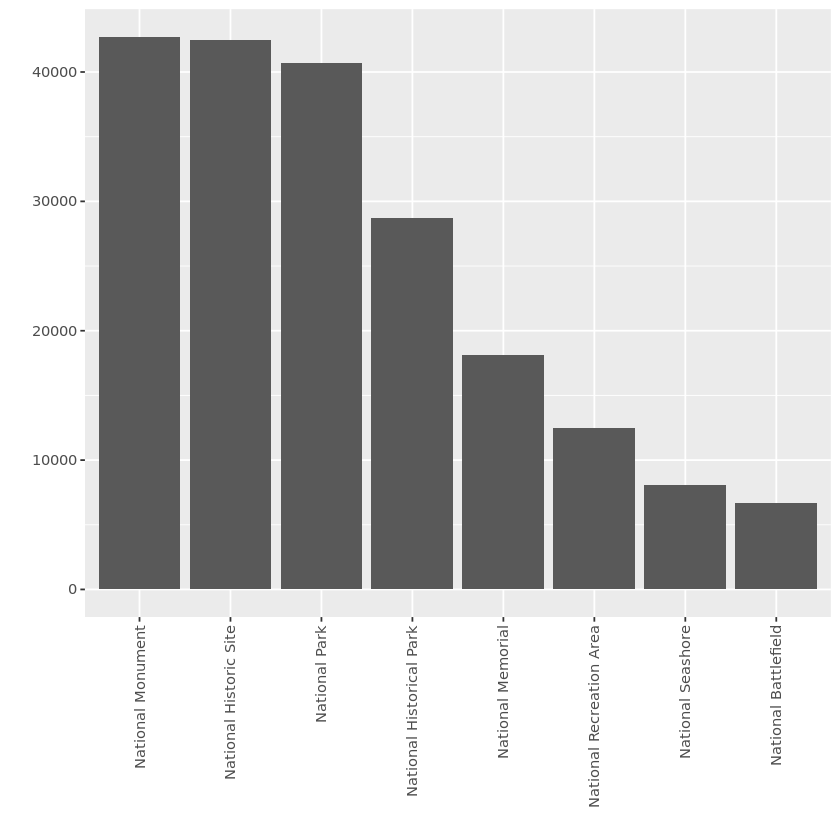

In [20]:
visits %>% group_by(ParkType) %>%
  summarize(n = sum(logVisits)) %>%
  ggplot(aes(x=reorder(ParkType,n,desc) , y=n)) +
  geom_bar(stat='identity')  +
  labs(x="", y="") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))#+
  #geom_text(aes(label= n), hjust=-0.1, size=3) 
  #labs(title="Top 20 movies title based \n on number of ratings" , caption = "source data: edx set")

In [21]:
# Most visited region

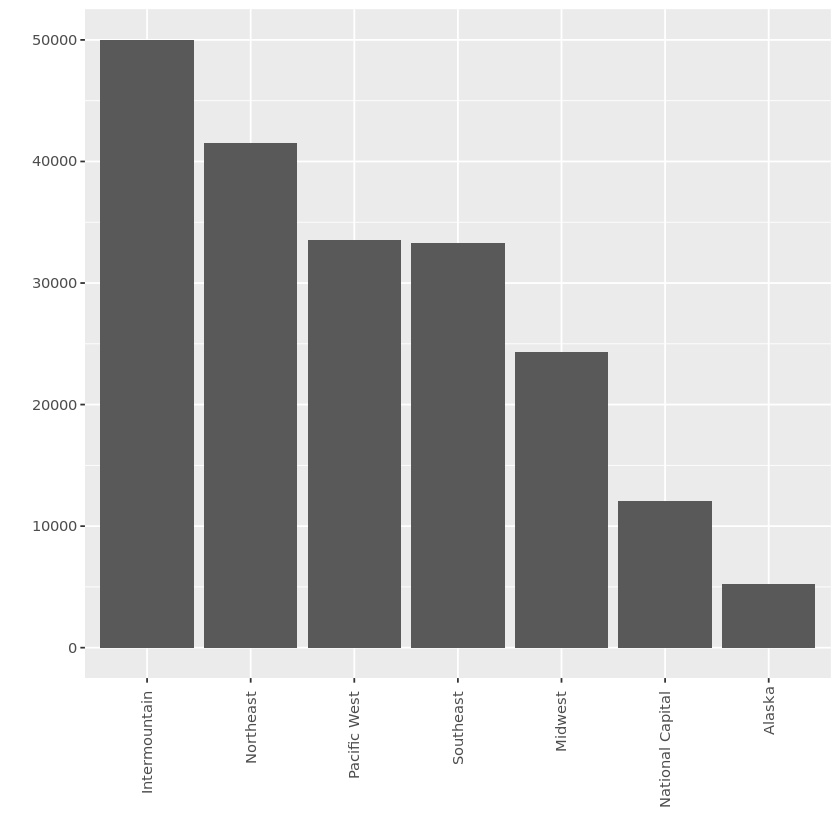

In [22]:
visits %>% group_by(Region) %>%
  summarize(n = sum(logVisits)) %>%
  ggplot(aes(x=reorder(Region,n,desc) , y=n)) +
  geom_bar(stat='identity')  +
  labs(x="", y="") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [23]:
## 20 Most visited state

Selecting by n

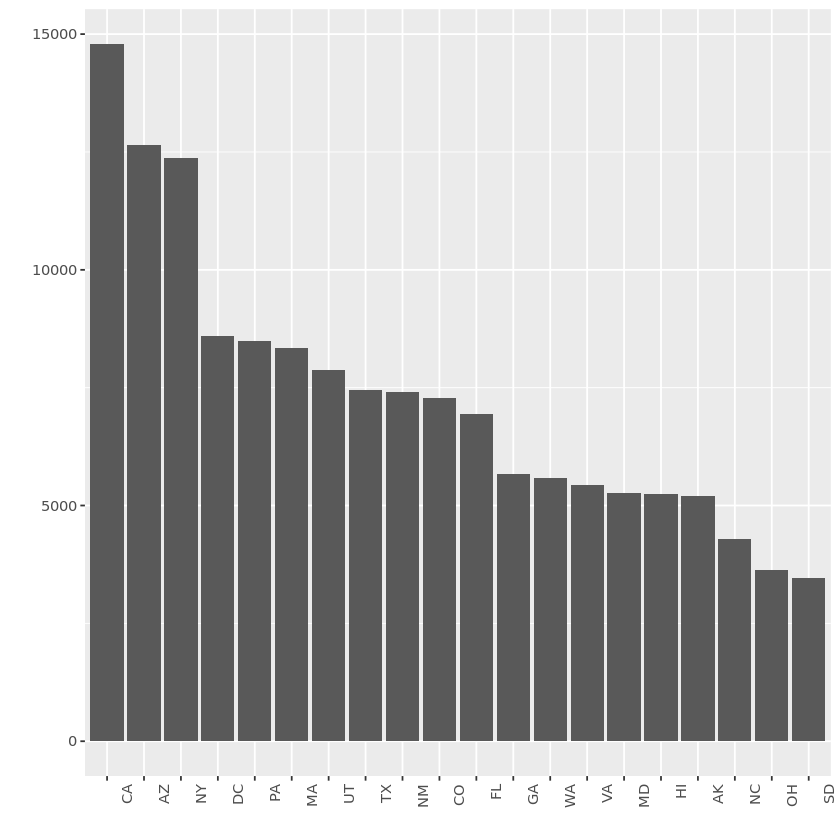

In [24]:
visits %>% group_by(State) %>%
  summarize(n = sum(logVisits)) %>%
  top_n(20,) %>%
  ggplot(aes(x=reorder(State,n,desc) , y=n)) +
  geom_bar(stat='identity')  +
  labs(x="", y="") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=2.5))

In [25]:
#Most frequents months

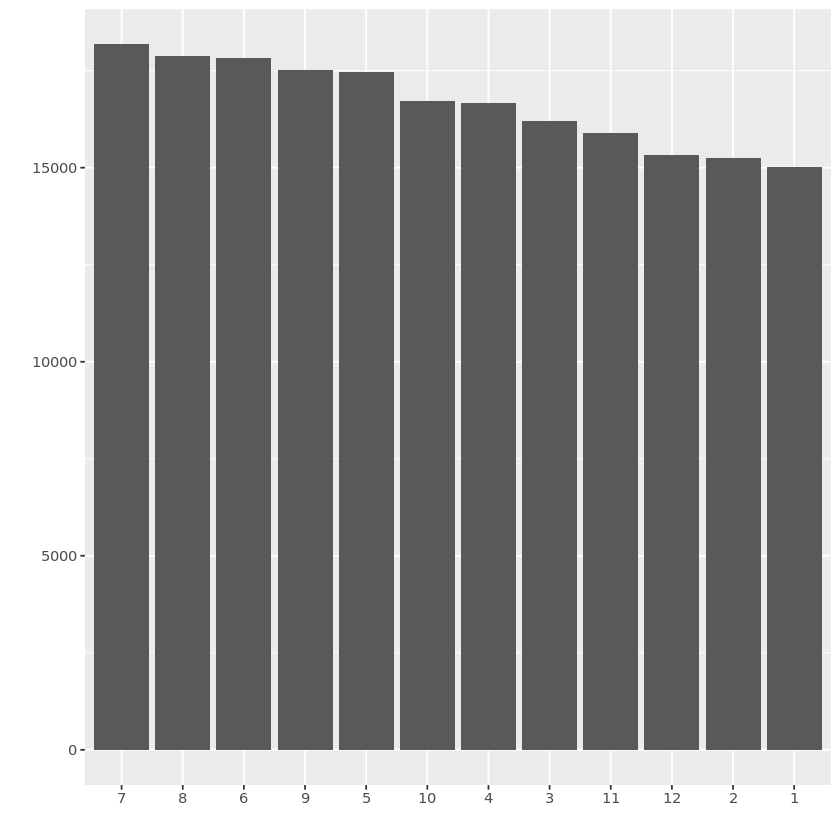

In [26]:
visits %>% group_by(Month) %>%
  summarize(n = sum(logVisits)) %>%
  ggplot(aes(x=reorder(Month,n,desc) , y=n)) +
  geom_bar(stat='identity')  +
  labs(x="", y="")# +
  #theme(axis.text.x=element_text(angle=90,hjust=1,vjust=2.5))

In [27]:
##Year with the most  visits

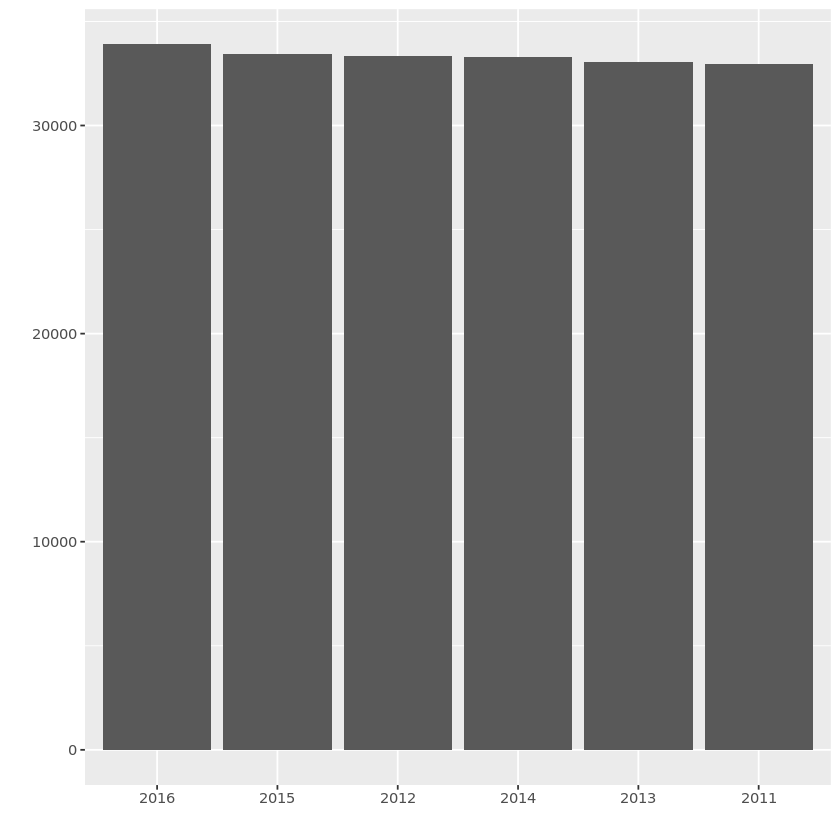

In [28]:
visits %>% group_by(Year) %>%
  summarize(n = sum(logVisits)) %>%
  ggplot(aes(x=reorder(Year,n,desc) , y=n)) +
  geom_bar(stat='identity')  +
  labs(x="", y="")# +
  #theme(axis.text.x=element_text(angle=90,hjust=1,vjust=2.5))

In [29]:
#Let's go in detail in the interesting categorical variable ParkType to analyze visits in each type of park

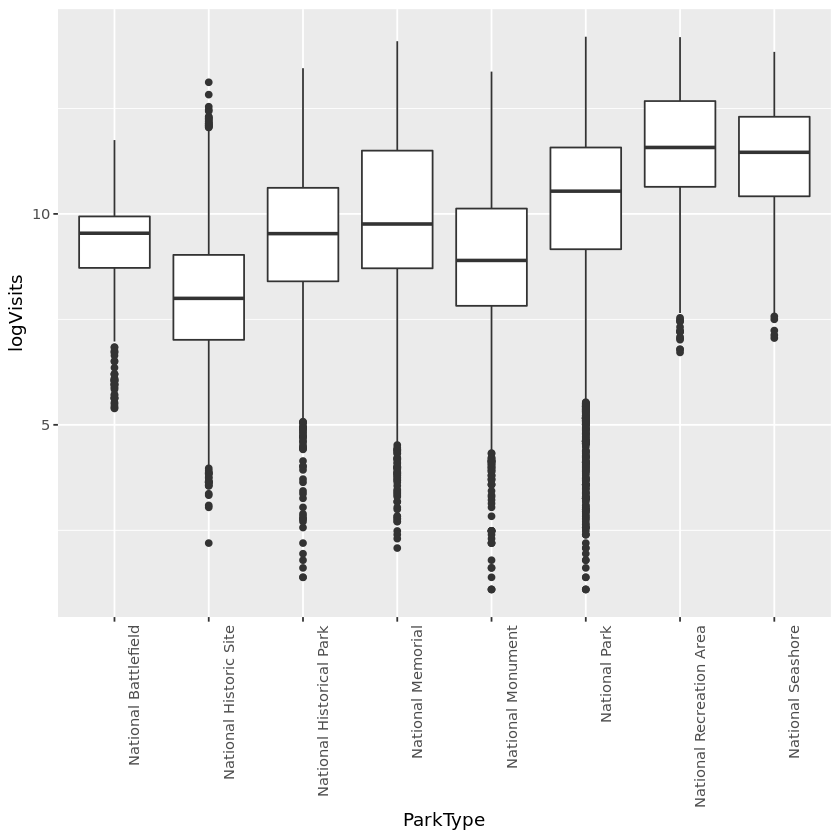

In [30]:
ggplot(data = visits, aes(x=ParkType, y=logVisits)) + geom_boxplot() + theme(axis.text.x=element_text(angle=90,hjust=1,vjust=2.5))

In [31]:
#Numerical relationship between logVisits and Cost

In [32]:
cor(visits$logVisits, visits$cost)

[1] 0.3583642

In [33]:
#There is a positive correlation between logVisits and cost, which could mean higher cost has fewer influence on frequentations
# likely because more expensive parks are often more popular due to other features of the parks

In [34]:
# Time serie analysis

In [35]:
ts=ts(visits$logVisits,start=c(2010,1),freq=12)

In [36]:
# Seasonal decomposition

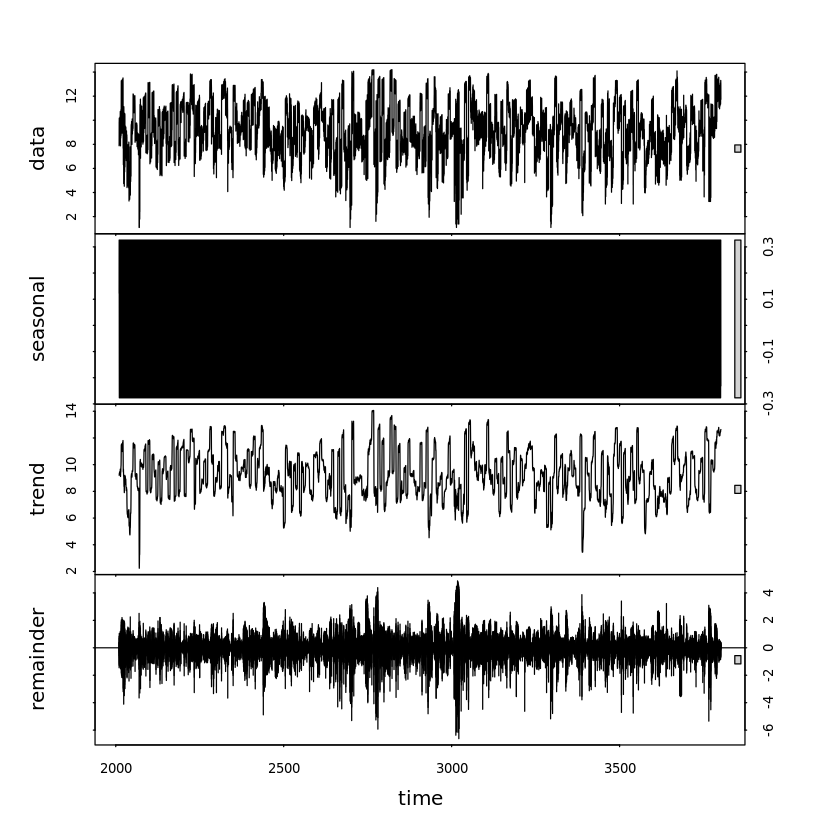

In [37]:
fit <- stl(ts, s.window="period")
plot(fit)

In [38]:
# Data splipting

In [39]:
#We are interested in predicting the log visits, let’s subset our dataset into a training and a testing set 
#by splitting based on the year: 
# training would contain 2010-2014 years of data, 
# and testing would be 2015-2016 data.


In [40]:
training = subset(visits, Year >= 2010 & Year <= 2014)
dim(training)

[1] 14338    12

In [41]:
testing = subset(visits, Year >= 2015 & Year <= 2016)
dim(testing)

[1] 7162   12

In [42]:
# Let's start by a simple linear model
# we will use those independants variable
# laglogVisits, laglogVisitsYear, Year, Month, Region, ParkType, and cost

In [43]:
visitsLM = lm(logVisits ~ laglogVisits + laglogVisitsYear + Year + Month + Region + ParkType + cost, data = training)
summary(visitsLM)


Call:
lm(formula = logVisits ~ laglogVisits + laglogVisitsYear + Year + 
    Month + Region + ParkType + cost, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9725 -0.2210 -0.0020  0.2079  9.4341 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -5.7680775  8.6949715  -0.663 0.507097    
laglogVisits                      0.5027913  0.0051052  98.485  < 2e-16 ***
laglogVisitsYear                  0.4106751  0.0048173  85.251  < 2e-16 ***
Year                              0.0031569  0.0043206   0.731 0.464994    
Month2                            0.1159852  0.0237187   4.890 1.02e-06 ***
Month3                            0.3534700  0.0238852  14.799  < 2e-16 ***
Month4                            0.2538986  0.0238456  10.648  < 2e-16 ***
Month5                            0.3888252  0.0239772  16.216  < 2e-16 ***
Month6                            0.2753548  0.0240065  11.470  < 2e-16 ***
Mo

In [44]:
# Predict test data
# we will metrics R square to evlauate our models

In [69]:
 LM.pred = predict(visitsLM, newdata=testing)
 LM.sse = sum((LM.pred - testing$logVisits)^2)
 LM.ssm = sum((LM.pred - mean(training$logVisits)) ^ 2) 

 R2.LM =  1 - LM.sse / LM.ssm
 print(R2.LM)

[1] 0.9411129


In [46]:
# Residuals plot

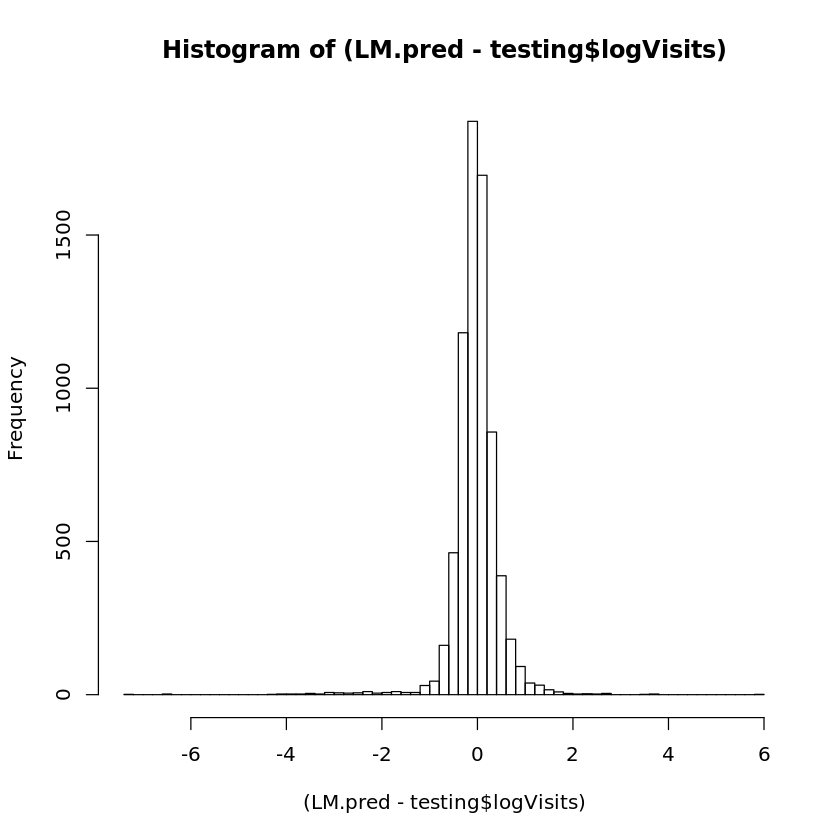

In [47]:
hist((LM.pred - testing$logVisits),breaks = 50)

In [48]:
# In addition to the logistic regression model, we can also train a regression tree. 
# Use the same set of variables as the previous problem 
# (laglogVisits, laglogVisitsYear, Year, Month, Region, ParkType, and cost), train a regression tree with cp = 0.05

In [49]:
install.packages("rpart.plot")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [50]:
library(rpart)
library(rpart.plot)

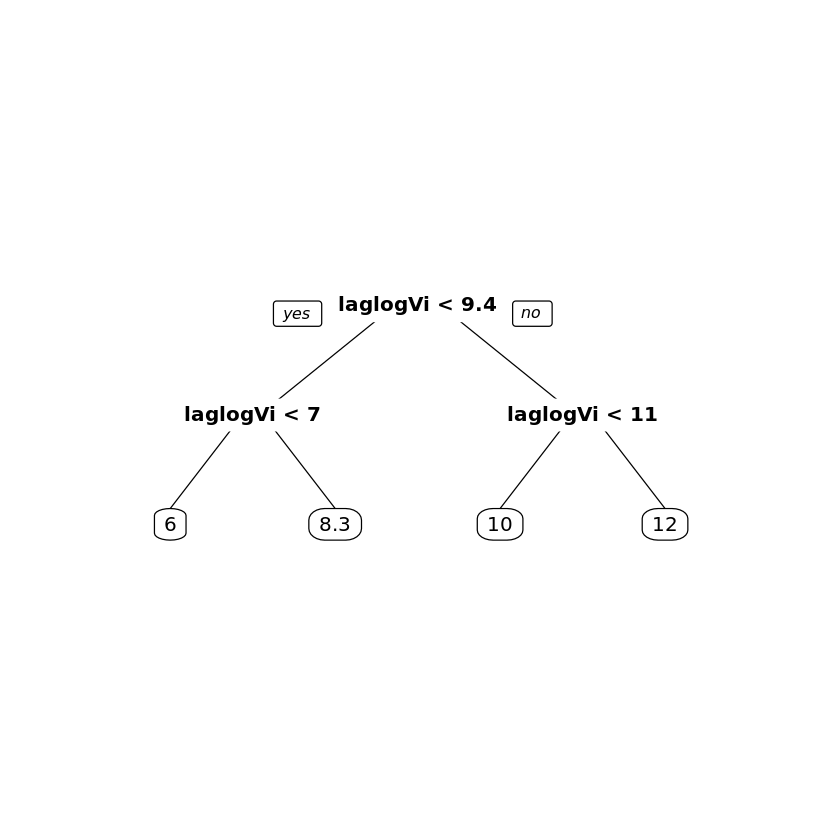

In [72]:
visitsTree = rpart(logVisits ~ laglogVisits + laglogVisitsYear + Year + Month + Region + ParkType + cost, data = training, cp=0.05)
prp(visitsTree)


In [52]:
# Evaluate Regression tree on test data set

In [73]:
tree.pred = predict(visitsTree, newdata=testing)
tree.sse = sum((tree.pred - testing$logVisits)^2)
tree.ssm = sum((tree.pred - mean(training$logVisits))^2) 

R2.tree = 1 - tree.sse / tree.ssm
print(R2.tree)

[1] 0.8326104


In [54]:
# Tree model performs less well than linear regession
# let's use tree with cross validation

In [74]:
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [75]:
 set.seed(201)
 tr.control = trainControl(method = "cv", number = 10)
 numFolds = trainControl( method = "cv", number = 10 )
 cpGrid = expand.grid( .cp = seq(0.0001,0.005,0.0001)) 
 train(logVisits ~ laglogVisits + laglogVisitsYear + Year + Month + Region + ParkType + cost, data = training, method = "rpart", trControl = numFolds, tuneGrid = cpGrid )

CART 

14338 samples
    7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 12906, 12905, 12903, 12904, 12903, 12905, ... 
Resampling results across tuning parameters:

  cp      RMSE       Rsquared   MAE      
  0.0001  0.4838971  0.9467770  0.2952133
  0.0002  0.4924362  0.9448958  0.3032523
  0.0003  0.4976597  0.9437303  0.3074828
  0.0004  0.5075856  0.9415064  0.3175902
  0.0005  0.5090270  0.9411936  0.3191110
  0.0006  0.5139388  0.9400830  0.3233982
  0.0007  0.5194519  0.9387892  0.3274553
  0.0008  0.5198011  0.9387014  0.3279586
  0.0009  0.5190786  0.9388980  0.3277833
  0.0010  0.5190786  0.9388980  0.3277833
  0.0011  0.5190786  0.9388980  0.3277833
  0.0012  0.5218088  0.9382561  0.3295830
  0.0013  0.5271344  0.9368804  0.3333222
  0.0014  0.5313146  0.9359253  0.3379208
  0.0015  0.5357965  0.9349171  0.3431950
  0.0016  0.5416167  0.9334610  0.3508861
  0.0017  0.5461812  0.9323744  0.3569955
  0.0018  0.5537915  0.9303121 

In [57]:
#Final Regression Tree
#let's re-run the regression tree on the training data, 
#now using the cp value equal to the one selected in the previous problem cp = 1e-04.


In [76]:
visitsTree = rpart(logVisits ~ laglogVisits + laglogVisitsYear + Year + Month + Region + ParkType + cost, data = training, cp = 1e-04)

In [77]:
# Let's evaluate tree model with cross validation

In [79]:
tree.pred2 = predict(visitsTree, newdata=testing)
tree.sse = sum((tree.pred - testing$logVisits)^2)
tree.sse = sum((tree.pred2 - testing$logVisits)^2)
tree.ssm = sum((testing$logVisits - mean(training$logVisits))^2)
R2.tree = 1 - tree.sse / tree.ssm
print(R2.tree)

[1] 0.960693


In [61]:
# big improvement noticed

In [62]:
#Random Forest
#We can potentially further improve the models by using a random forest.
# we train a random forest model with the same set of covariates, 
# and using just default parameters 
#This may take a few minutes.


In [63]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [64]:
#Model building and evaluated

In [68]:
set.seed(201)
RandonForest = randomForest(logVisits ~ laglogVisits + laglogVisitsYear + Year + Month + Region + ParkType + cost, data = training) 
Forest.pred3 = predict(RandonForest, newdata=testing)
Forest.sse = sum((Forest.pred3 - testing$logVisits)^2)
#Forest.ssm = sum((testing$logVisits - mean(visits$logVisits))^2)
Forest.ssm = sum((Forest.pred3 - mean(training$logVisits))^2)
R2.Forest = 1 - Forest.sse / Forest.ssm
print(R2.Forest)

[1] 0.969775


In [66]:
# new improvements